# US Flights of 2008
## by (Himanshu Tripathi)


> The dataset reports flights in the United States, including carriers, arrival and departure delays from 1987 to 2008. Actually, the plan was to gather & analyze data for three years (2006, 2007 & 2008). However it is time consuming to treat the report due to the detaset size which is (21,604,865) observations. Therefore, the report will gather & analyze flights of 2008 which is (7,009,728) observations by resolve the following questions:-
> - what are the best airports/states in terms of delayed and cancelled flighes?
> - what are the best airlines in terms of delayed and cancelled flighes?
> - what are the best flights in terms of delayed and cancelled flighes?


In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from zipfile import ZipFile
from urllib.request import urlopen  
import os

In [0]:
# # gathering flights details for 3 years (2006 - 2008) 

# df = pd.DataFrame()
# for i in range(6,9):
#     url = 'http://stat-computing.org/dataexpo/2009/20{:02d}.csv.bz2'.format(i)
#     file_name = '20{:02d}.bz2'.format(i)
    
#     url_object = urlopen(url)
#     output = open(file_name, 'wb')
#     output.write(url_object.read())
#     output.close()
    
#     df = df.append(pd.read_csv(file_name), ignore_index=True)
#     os.remove(file_name)

In [0]:
# retrieving data
df = pd.read_csv('2008.csv')
df_airports = pd.read_csv('airports.csv')
df_airlines = pd.read_csv('carriers.csv')

In [0]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [0]:
# adding airlines details into df
df = pd.merge(df, df_airports, left_on='Origin', right_on='iata')

| Name	|   Description |
| ---|---|
| Year	|   1987-2008 |
| Month	|   1-12 |
| DayofMonth	|   1-31 |
| DayOfWeek	|   1 (Monday) - 7 (Sunday) |
| DepTime	|   actual departure time (local, hhmm) |
| CRSDepTime	|   scheduled departure time (local, hhmm) |
| ArrTime	|   actual arrival time (local, hhmm) |
| CRSArrTime	|   scheduled arrival time (local, hhmm) |
| UniqueCarrier	|   unique carrier code |
| FlightNum	|   flight number |
| TailNum	|   plane tail number |
| ActualElapsedTime	|   in minutes |
| CRSElapsedTime	|   in minutes |
| AirTime	|   in minutes |
| ArrDelay	|   arrival delay, in minutes |
| DepDelay	|   departure delay, in minutes |
| Origin	|   origin IATA airport code |
| Dest	|   destination IATA airport code |
| Distance	|   in miles |
| TaxiIn	|   taxi in time, in minutes |
| TaxiOut	|   taxi out time in minutes |
| Cancelled	|   was the flight cancelled? |
| CancellationCode	|   reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
| Diverted	|   1 = yes, 0 = no |
| CarrierDelay	|   in minutes |
| WeatherDelay	|   in minutes |
| NASDelay	|   in minutes |
| SecurityDelay	|   in minutes |
| LateAircraftDelay	|   in minutes |

In [0]:
# correcting dates formate
df['DepTime'] = df.DepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRSDepTime'] = df.CRSDepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['ArrTime'] = df.ArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRSArrTime'] = df.CRSArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)

In [0]:
# creating AM/PM feature into df
def setPM(x):
    if((x>=12) & (x<= 23)):
        return 'PM'
    elif((x>=0) & (x<= 11) | (x==24)):
        return 'AM'
    else:
        return x
    
df.DepTime.dropna(inplace=True)
df['DepTimePM'] = df.DepTime.str[:2].astype('int64')
df['DepTimePM'] = df.DepTimePM.apply(setPM)
df.DepTimePM.dropna(inplace=True)

### What is the structure of your dataset?

> There are 7,009,728 flight observations with 30 features in 2008.

### What is/are the main feature(s) of interest in your dataset?

> delayed and canceled flights in terms fo carriers, locations & time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `ArrDelay`, `DepDelay`, `Cancelled`, `Month`, `DayOfWeek`, `DepTime`, `ArrTime`, `UniqueCarrier`, `Origin` & `Dest`.


## Univariate Exploration

### what are airlines sizes?

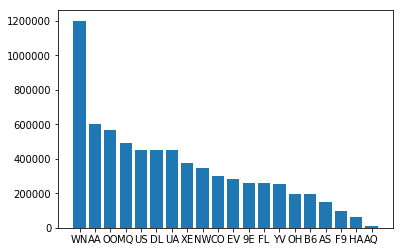

In [0]:
airlines = df.UniqueCarrier.value_counts()
plt.bar(airlines.index, airlines);

> There are differentiation of flights quantity among airlines.

### what are flights size in each state?

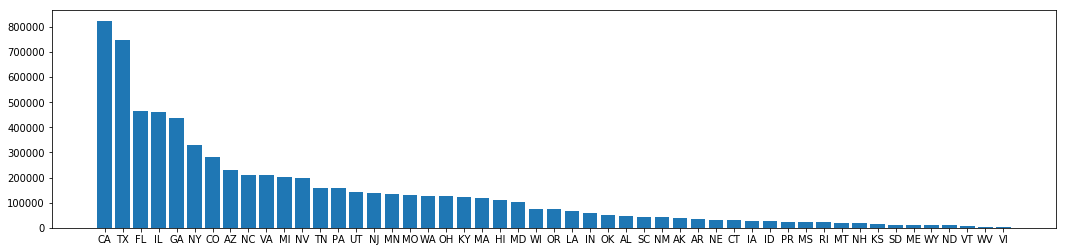

In [0]:
plt.figure(figsize=[18,4])
states = df.state.value_counts()

plt.bar(states.index, states);

> There are differentiation of flights quantity among airlines.

### how are flights distributed during months?

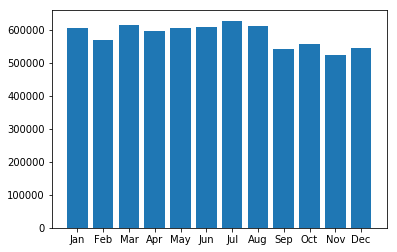

In [0]:
width = 1
bins = np.arange(1, 14, width)
plt.hist(df.Month, rwidth=.8 , bins=bins)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1.5,max(bins),width), months_names);

> There are not big difference amonge monthes in the flights quantity, lowest monthes are after summer till the end of year.

### how are flights distributed during days of week?

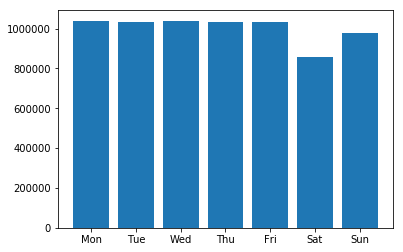

In [0]:
width = 1
bins = np.arange(1, 9, width)
plt.hist(df.DayOfWeek, rwidth=.8 , bins=bins)
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(1.5,max(bins),width), name_days);

> There are little drop of flights in weekend.

### what is the rate of cancelled flights?

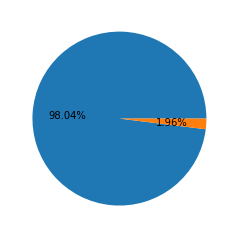

In [0]:
plt.pie(df.Cancelled.value_counts(), autopct='%.2f%%');

> There are 137,434 flights (1.96%) were cancelled.

### What is the distribution of departure delay?

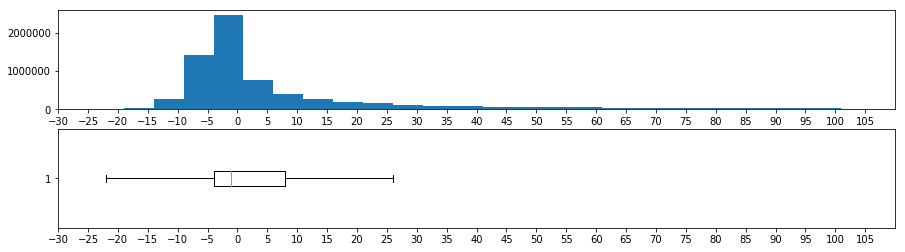

In [0]:
plt.figure(figsize=[15,4])

plt.subplot(2,1,1)
step = 5
x_min, x_max = -30, 110
bin_edges = np.arange(df.DepDelay.min()-step, df.DepDelay.max()+step, step)
plt.hist(df.DepDelay, bins=bin_edges)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step))


plt.subplot(2,1,2)
plt.boxplot(x=df[pd.notnull(df.DepDelay)].DepDelay, vert=False, showfliers=False)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step));


> There are delayed departures as well as earlier departures and the most of them are between -25 to 25 min differ of the scheduled time. However, there is a flight has been delayed more than 1 day and 17 hours, and also there is a flight had be earlier around 9 hours of the schedule time.

### What is the distribution of arrival delay?

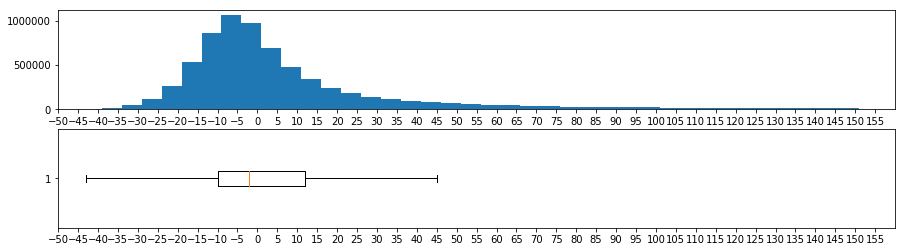

In [0]:
plt.figure(figsize=[15,4])

plt.subplot(2,1,1)
step = 5
x_min, x_max = -50, 160
bin_edges = np.arange(df.ArrDelay.min()-step, df.ArrDelay.max()+step, step)
plt.hist(df.ArrDelay, bins=bin_edges)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step))

plt.subplot(2,1,2)
plt.boxplot(x=df[pd.notnull(df.ArrDelay)].ArrDelay, vert=False, showfliers=False)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));

> There are delayed arrivals as well as earlier arrivals and the most of them are between -45 to 45 min differ of the scheduled time.

## Bivariate Exploration

### What is the relationship among `Cannelled`, `DepDelay`, `ArrDelay` & flight quantity of airlines in terms of airlines?

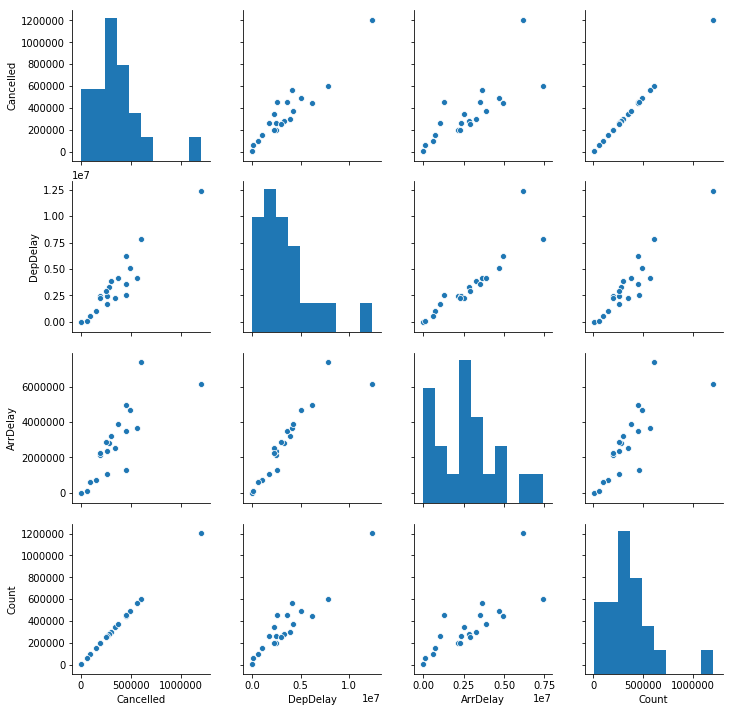

In [0]:
sample = df.groupby('UniqueCarrier')
sample = pd.merge(
    pd.DataFrame(sample.Cancelled.count()), 
    pd.DataFrame(sample.DepDelay.sum()), 
    on='UniqueCarrier'
).merge(
    pd.DataFrame(sample.ArrDelay.sum()), on='UniqueCarrier'
).merge(
    pd.DataFrame(sample.Year.count()), on='UniqueCarrier'
)

sample.rename(columns={'Year':'Count'}, inplace=True)

sb.pairplot(sample);

> There are positive correlation coefficients among `Cannelled`, `DepDelay`, `ArrDelay` & flight quantity of airlines.

### What is the relationship among `Cannelled`, `DepDelay`, `ArrDelay` & flight quantity of airlines in terms of states?

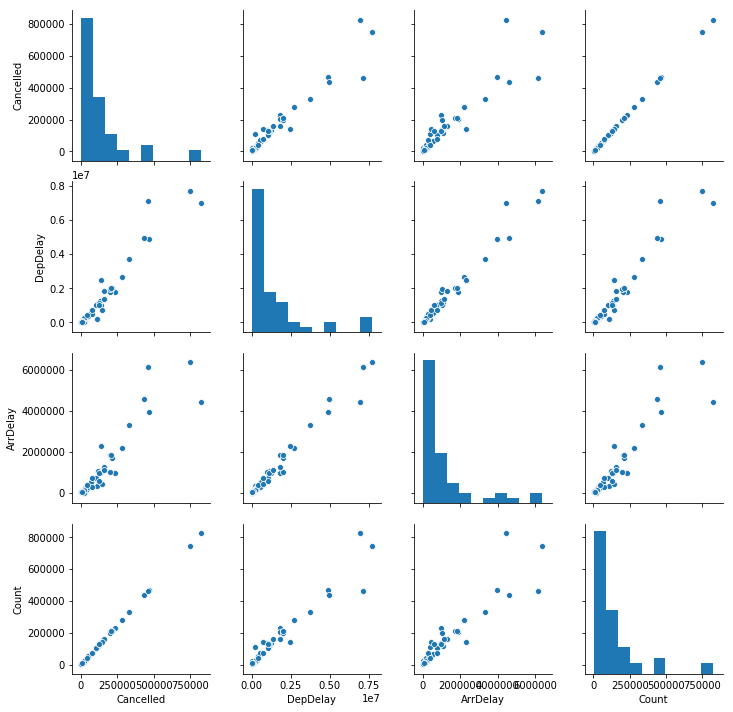

In [0]:
sample = df.groupby('state')
sample = pd.merge(
    pd.DataFrame(sample.Cancelled.count()), 
    pd.DataFrame(sample.DepDelay.sum()), 
    on='state'
).merge(
    pd.DataFrame(sample.ArrDelay.sum()), on='state'
).merge(
    pd.DataFrame(sample.Year.count()), on='state'
)

sample.rename(columns={'Year':'Count'}, inplace=True)

sb.pairplot(sample);

> There are positive correlation coefficients among `Cannelled`, `DepDelay`, `ArrDelay` & flight quantity of states.

### What is the relationship between states & airlines?

In [0]:
state_airlines = df.groupby(['state', 'UniqueCarrier'], as_index=False).count()
state_airlines = state_airlines[['state', 'UniqueCarrier']]

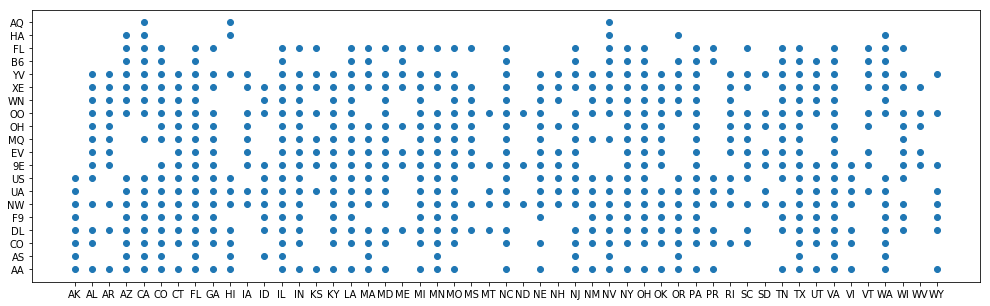

In [0]:
plt.figure(figsize=[17,5])
plt.scatter(state_airlines.state, state_airlines.UniqueCarrier);

> The most of airlines reach the most of states.

### How much cancelled flights for each airlines?

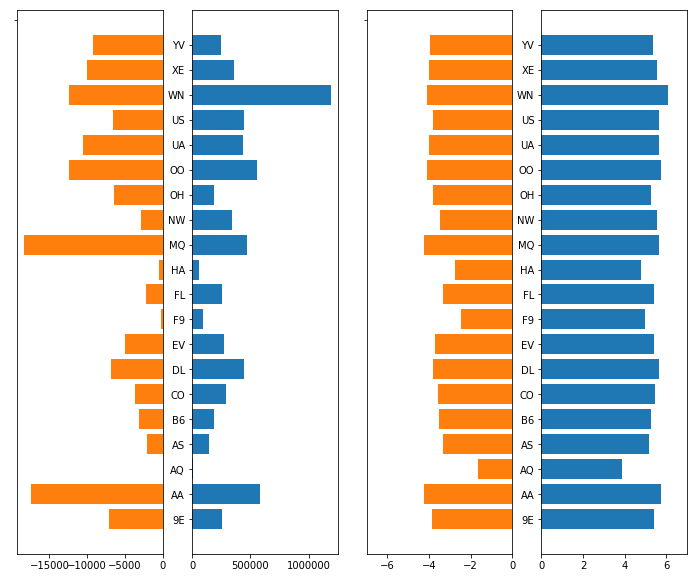

In [0]:
carriers = df.groupby(['UniqueCarrier','Cancelled'], as_index=False).count()
carriers = carriers.pivot_table('Year', 'UniqueCarrier', 'Cancelled', fill_value=0)
carriers.rename(columns={0:'cxl_0', 1:'cxl_1'}, inplace=True)

plt.figure(figsize=[12,10])
carriers
plt.subplot(1,4,2)
plt.barh(carriers.index, carriers.cxl_0, color='C0')


plt.subplot(1,4,1)
plt.barh(carriers.index, carriers.cxl_1*-1, color='C1')
plt.yticks(' ')


carriers.cxl_0 = np.log10(carriers.cxl_0)
carriers.cxl_1 = np.log10(carriers.cxl_1)

plt.subplot(1,4,4)
plt.barh(carriers.index, carriers.cxl_0, color='C0')
plt.xlim(0, 7)


plt.subplot(1,4,3)
plt.barh(carriers.index, carriers.cxl_1*-1, color='C1')
plt.xlim(-7, 0)
plt.yticks(' ');


> Normalizing data by log10 make it more informative.

## Multivariate Exploration

### Exploring geo heatmap in terms of flights delay?

In [0]:
# these function to fix the color matter in scatter plot
def correct_dep_delay_color(x):
    v_max, v_min = 25, -25
    if(x>v_max): 
        x=v_max
    elif(x<v_min):
        x=v_min
    return x

def correct_arr_delay_color(x):
    v_max, v_min = 45, -45
    if(x>v_max): 
        x=v_max
    elif(x<v_min):
        x=v_min
    return x


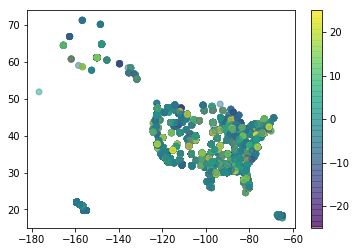

In [0]:
# getting sample for fast rendering
sample = df.sample(100000)
sample.DepDelay = sample.DepDelay.apply(correct_dep_delay_color)

plt.scatter(x=sample.long, y=sample.lat, alpha=.5, c=sample.DepDelay)
plt.colorbar();

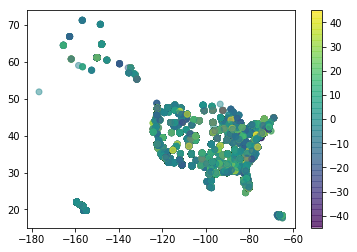

In [0]:
sample.DepDelay = sample.ArrDelay.apply(correct_arr_delay_color)

plt.scatter(x=sample.long, y=sample.lat, alpha=.5, c=sample.DepDelay)
plt.colorbar();

> The heatmap explore US map :)

### Exploring delay and cancelation factors with airlines and their size.

In [0]:
airlines_mean = df.groupby('UniqueCarrier', as_index=False).mean()
airlines_count = df.groupby('UniqueCarrier', as_index=False).count()

airlines = airlines_mean[['UniqueCarrier','ArrDelay','Cancelled']].merge(
    airlines_count[['UniqueCarrier','Year']], on='UniqueCarrier'
)
airlines.rename(columns={'Year':'Count'}, inplace=True)

airlines['Size'] = airlines.Count.map(lambda x: round(x/120000)+1)
airlines['Size'] = airlines.Size.map(lambda x: 7 if x>7 else x)

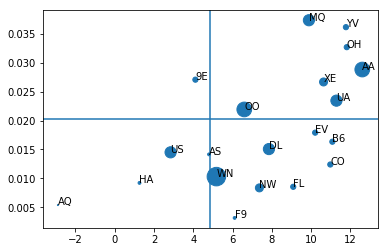

In [0]:

plt.scatter(airlines.ArrDelay, airlines.Cancelled, s=airlines.Size**3)

x_max = max(airlines.ArrDelay)
x_min = min(airlines.ArrDelay)

y_max = max(airlines.Cancelled)
y_min = min(airlines.Cancelled)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.05
y = y_len*.05

plt.xlim(x_min-x, x_max+x)
plt.ylim(y_min-y, y_max+y)
plt.axhline(y=y_max-(y_len/2))
plt.axvline(x_max - (x_len/2))

for i, txt in enumerate(airlines.UniqueCarrier):
    plt.annotate(txt, (airlines.ArrDelay[i], airlines.Cancelled[i]));


> delay factor is impact on the most airlines while cancellation is impact on around half of them.

### Exploring delay and cancelation factors with states and flights size.

In [0]:
state_mean = df.groupby('state', as_index=False).mean()
state_count = df.groupby('state', as_index=False).count()

states = state_mean[['state','ArrDelay','Cancelled']].merge(
    state_count[['state','Year']], on='state'
)
states.rename(columns={'Year':'Count'}, inplace=True)

In [0]:
states['Size'] = states.Count.map(lambda x: round(x/120000)+1)
states['Size'] = states.Size.map(lambda x: 7 if x>7 else x)

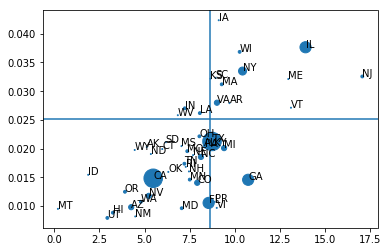

In [0]:

plt.scatter(states.ArrDelay, states.Cancelled, s=states.Size**3)

x_max = max(states.ArrDelay)
x_min = min(states.ArrDelay)

y_max = max(states.Cancelled)
y_min = min(states.Cancelled)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.05
y = y_len*.05

plt.xlim(x_min-x, x_max+x)
plt.ylim(y_min-y, y_max+y)
plt.axhline(y=y_max-(y_len/2))
plt.axvline(x_max - (x_len/2))

for i, txt in enumerate(states.state):
    plt.annotate(txt, (states.ArrDelay[i], states.Cancelled[i]));


> There is variation among states in terms of delayed and cancelled flightes and also the quantity of flights.

### Exploring the relationship among delay and cancellation factors with flights in terms of time (AM/PM).

In [0]:
flights_mean = df.groupby(['FlightNum','DepTimePM'], as_index=False).mean()
flights_count = df.groupby('FlightNum', as_index=False).count()

flights = flights_mean[['FlightNum','DepTimePM', 'DepDelay','Cancelled']].merge(
    flights_count[['FlightNum','Year']], on='FlightNum'
)
flights.rename(columns={'Year':'Count'}, inplace=True)

In [0]:
Q1 = flights.quantile(.25)
Q3 = flights.quantile(.75)
IQ = Q3-Q1
Q_max = Q3+IQ*1.5
Q_min = Q1-IQ*1.5

In [0]:
# ignoring outliers
flights_filtered = flights[(flights.DepDelay > Q_min.DepDelay) & (flights.DepDelay < Q_max.DepDelay)]

flights_filtered = flights_filtered[
    (flights_filtered.Count > Q_min.Count) & (flights_filtered.Count < Q_max.Count)
]

flights_no_cxl = flights_filtered[flights_filtered.Cancelled == 0]
flights_filtered = flights_filtered[flights_filtered.Cancelled > 0]

flights_filtered.reset_index(inplace=True)

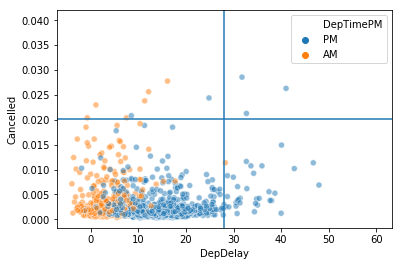

In [0]:
flights_filtered = flights[flights.Cancelled > 0]

sb.scatterplot(flights_filtered.DepDelay, flights_filtered.Cancelled, alpha=.5, hue=flights_filtered.DepTimePM)

# x_max = max(flights_filtered.DepDelay)
x_max = 60
x_min = min(flights_filtered.DepDelay)

# y_max = max(flights_filtered.Cancelled)
y_max = .04
y_min = min(flights_filtered.Cancelled)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.05
y = y_len*.05

plt.xlim(x_min-x, x_max+x)
plt.ylim(y_min-y, y_max+y)
plt.axhline(y=y_max-(y_len/2))
plt.axvline(x=x_max - (x_len/2));

> Cancelled flights are in AM flights, while PM flights have more delayed flights.

In [0]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration.ipynb'])

0